In [1]:
%matplotlib inline
from subprocess import run
import os
from matplotlib import patches, collections
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from cartopy import crs, feature
import xarray as xr
import numpy as np

In [2]:
# Target resolution grids for E3SMv1
grid_dir = '/mnt/d/Work/Codes/grid_dir'
os.makedirs(grid_dir, exist_ok=True)
res_list = [4, 16, 30, 120]
for res in res_list:
    run(f'GenerateCSMesh --alt --res {res} --file {grid_dir}/ne{res}.g'.split(' '), capture_output=True)

In [3]:
# Open the grid files as xarray
ne4 = xr.open_dataset(grid_dir+'/ne4.g')
ne16 = xr.open_dataset(grid_dir+'/ne16.g')
ne30 = xr.open_dataset(grid_dir+'/ne30.g')
ne120 = xr.open_dataset(grid_dir+'/ne120.g')

In [4]:
# Func to plot the exodus files
def get_lines(ds,ax):
    x = ds['coord'][0,:].squeeze()
    y = ds['coord'][1,:].squeeze()
    z = ds['coord'][2,:].squeeze()
    lon = np.arctan2(y, x) * 180.0 / np.pi
    lat = np.arcsin(z) * 180.0 / np.pi
    corner_indices = ds['connect1']
    xx = lon[corner_indices[:,:] - 1]
    yy = lat[corner_indices[:,:] - 1]
    lines = [[[xx[i,j], yy[i,j]] for j in range(xx.shape[1])] for i in range(xx.shape[0])]
    line_collection = collections.LineCollection(lines, transform=crs.Geodetic(),colors='k',linewidth=0.1)
    ax.add_collection(line_collection)

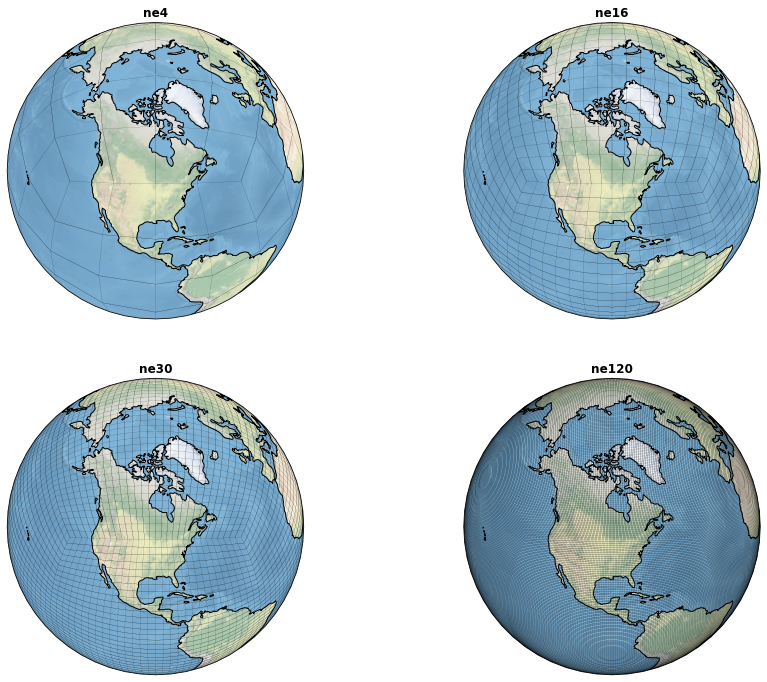

In [6]:
# Compare grids
figure = plt.figure(figsize=(15, 12))
i=1
for grid,t in zip([ne4, ne16, ne30, ne120],['ne4', 'ne16', 'ne30', 'ne120']):
    ax = figure.add_subplot(220+i, projection=crs.Orthographic(central_latitude=50,central_longitude=-90))
    ax.stock_img()
    ax.coastlines()
    lines=get_lines(grid,ax)
    ax.set_title(t, weight='bold',fontsize=12)
    i=i+1

In [7]:
# Produce scrip files for each grid type
# These can be used to make the map files
for res in res_list:
    run(f'ConvertExodusToSCRIP --in {grid_dir}/ne{res}.g --out {grid_dir}/ne{res}np4_scrip.nc'.split(' '), capture_output=True)

In [8]:
# Checking out the grid size for each grids in the scrip files
for res in res_list:
    print('Grid size of ne'+str(res), xr.open_dataset(grid_dir+'/ne'+str(res)+'np4_scrip.nc').dims['grid_size'])

Grid size of ne4 96
Grid size of ne16 1536
Grid size of ne30 5400
Grid size of ne120 86400
